Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


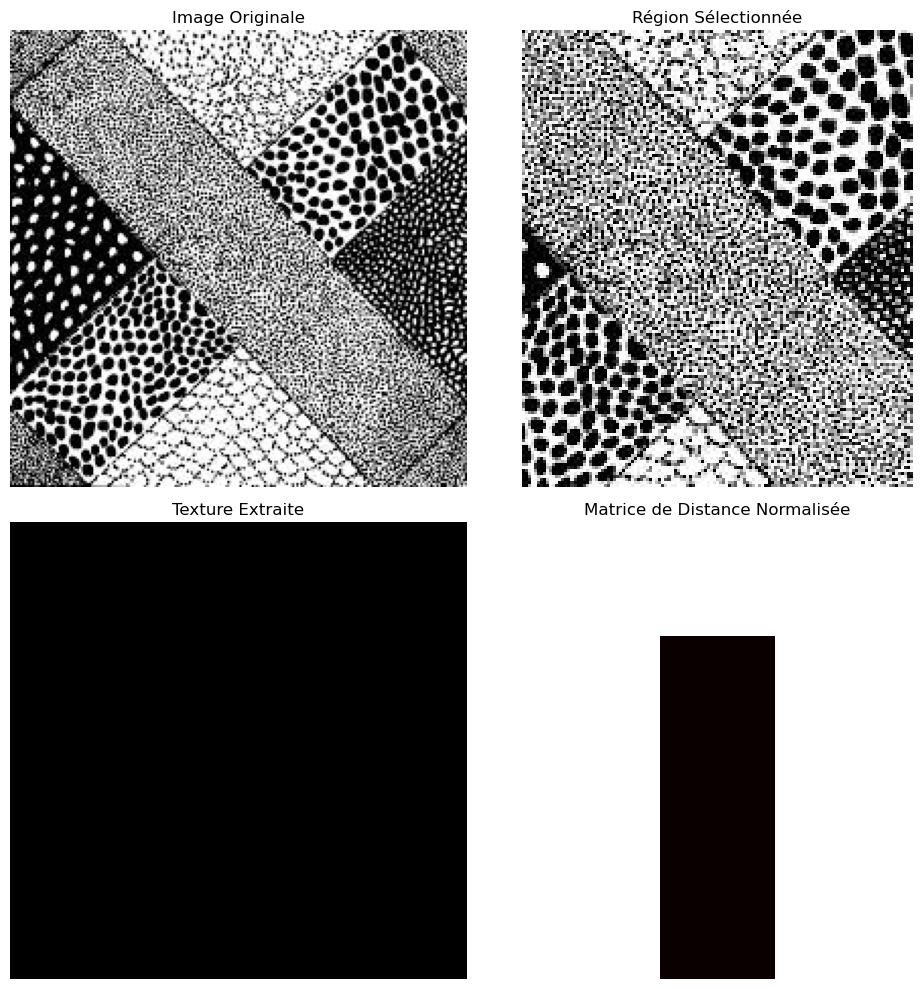

: 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gabor_filters(img, ksize=31):
    orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    scales = [4, 8, 16]
    filtered_images = []
    
    for theta in orientations:
        for sigma in scales:
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, 10, 0.5, 0, ktype=cv2.CV_32F)
            filtered_img = cv2.filter2D(img, cv2.CV_32F, kernel)
            filtered_images.append(filtered_img)
    
    return filtered_images

def extract_texture(img, region, tolerance=0.5):
    x, y, w, h = region
    
    if w == 0 or h == 0:
        return np.zeros(img.shape, dtype=np.uint8)
    
    selected_region = img[y:y+h, x:x+w]
    
    filters = apply_gabor_filters(img)
    
    selected_filters = apply_gabor_filters(selected_region)
    selected_stats = [(np.mean(f), np.std(f)) for f in selected_filters]
    
    binary_img = np.zeros(img.shape, dtype=np.uint8)

    for i, f in enumerate(filters):
        mean, std = selected_stats[i]
        normalized_filter = cv2.normalize(f, None, 0, 255, cv2.NORM_MINMAX)
        mask = (normalized_filter >= (mean - tolerance * std)) & (normalized_filter <= (mean + tolerance * std))
        mask = (mask * 255).astype(np.uint8)
        binary_img = cv2.bitwise_or(binary_img, mask)
    
    return binary_img, selected_region

img_path = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab6/Image/b.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is not None:
    roi = cv2.selectROI("Sélectionnez une région", img)
    cv2.destroyAllWindows()
    
    binary_result, selected_region = extract_texture(img, roi, tolerance=0.5)
    
    if binary_result is not None:
        # Matrice de distance normalisée
        dist_matrix = cv2.norm(selected_region, cv2.NORM_L2, mask=None)
        dist_matrix = cv2.normalize(dist_matrix, None, 0, 255, cv2.NORM_MINMAX)

        # Affichage avec matplotlib
        plt.figure(figsize=(10, 10))
        
        # Afficher l'image originale
        plt.subplot(2, 2, 1)
        plt.title("Image Originale")
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        # Afficher la région sélectionnée
        plt.subplot(2, 2, 2)
        plt.title("Région Sélectionnée")
        plt.imshow(selected_region, cmap='gray')
        plt.axis('off')

        # Afficher la texture extraite
        plt.subplot(2, 2, 3)
        plt.title("Texture Extraite")
        plt.imshow(binary_result, cmap='gray')
        plt.axis('off')

        # Afficher la matrice de distance normalisée
        plt.subplot(2, 2, 4)
        plt.title("Matrice de Distance Normalisée")
        plt.imshow(dist_matrix, cmap='hot')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
